<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_ensemble_error.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab: Ensemble error

Digging into Rascha's calculation of ensemble error.

Ref: Raschka's [ch07.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch07/ch07.ipynb)

# Binomial distribution


If $X$ follows a binomial distribution, 

$$ X \sim B(n,p) $$

then the probability of getting $k$ successes is 

$$
Pr(k; n, p) = {n \choose k} p^k (1-p)^{n-k}
$$

where the binomial coefficient ${n \choose k}$, $n$ choose $k$, is the number of ways that $k$ objects can be selected from $n$ objects, regardless of order. It is given by the formula:

$$
{n \choose k} = \frac{n!}{k! (n-k)!}
$$

More formally, in combinatorics it is the number of $k$-element unordered subsets of an $n$-element set.

Reference: [Binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient) -- wikipedia



# $n=2$

With $n=2$, you can use your intuition. There are ${2 \choose 1} = 2$ ways to get $k=1$ heads with $n=2$ tosses of the coin: 

* heads on the first toss followed by tails on the second,
* tails on the first toss followed by heads on the second. 

The probability of heads followed by tails is $p^2 = (0.5)^2 = 0.25$. Likewise for tails followed by heads. And the probability of getting $k=1$ heads regardless of order is the sum of probabilities of each event: $0.5$. This is consistent with the formula for $Pr(k; n, p)$ with $k=1$ and $n=2$, namely,

$$
Pr(1; 2, 0.5) = \frac{2!}{1! (2-1)!} (0.5)^1 (1-.5)^{2-1} =
\frac{2}{1}(.5)(.5)^1 = 2(.5)(.5) = .5
$$



# $n=3$

With 3 tosses of a coin, you start to rely on the formulas. The probability of getting $k=2$ heads is

$$
Pr(k=2; n=3, p=0.5) = \frac{3!}{2! (3-2)!} (0.5)^2 (1-.5)^{3-2} =
\frac{6}{2}(.5)^2(.5) = 3(.25)(.5) = .375
$$

The probability of getting $k=3$ heads with $n=3$ tosses of the coin is $.5^3 = .125$. So the probability of getting at least $k=2$ heads with $n=3$ tosses of the coin is

$$
Pr(k \geq 2; n=3, p=.5) = 0.375 + 0.125 = 0.5
$$

In [1]:
# Cells 5 & 6 from Raschka
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)

ensemble_error(n_classifier=3, error=0.5)

0.5

# Ensemble error

The probability of getting at least $k$ heads from $n$ tosses of a coin is

$$
Pr(y \geq k; k, n) = \sum_{i=k}^n Pr(i; n, p) = \sum_{i=k}^n {n \choose k} p^k (1-p)^{n-k}
$$
This is the formula that Raschka uses on p225 for $P(k \geq n)$. In that case, he's computing the probability of making an error with an ensemble classifier comprised of $n$ classifiers each with an error rate of $\epsilon$.

For example, he uses this formula to compute the probability that $n=11$ classifiers will produce an incorrect classification with majority vote. When $n=11$, the majority vote will be in error for $k \geq 6$. $p$ is the probability of making a mistake, i.e., it's the error rate $\epsilon$ for a classifier. So if you use a conservative estimate $p = \epsilon = .25$, then you can compute the result 

$$Pr(y>6; n=11, p=.25) = .0034$$



In [2]:
ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

Raschka goes on to compute the ensemble error as a function of the "base error" $\epsilon$ of an individual classifier.

### Caveat

It's important to remember the assumptions that went into the problem formulation, namely, that the individual events are random and independent of one another (like coin tosses). It's worthwhile to think about whether or not these assumptions hold when you're computing ensemble error rates for ensemble classifiers with real datasets.

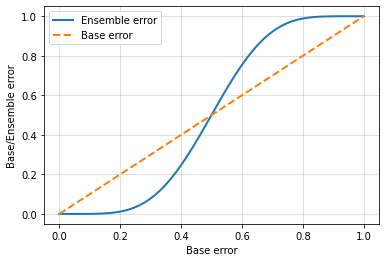

In [9]:
# Cells 7 & 8 from Raschka
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
              for error in error_range]


# Plot the error rate
plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()